# 1.Data Processing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

train_cleaned = train.dropna(how = 'any', axis = 0)
test_cleaned = test.dropna(how = 'any', axis = 0)

x_train=train[train.columns.drop(['class'])]
y_train=train["class"].values.ravel()
x_test=test[test.columns.drop(['class'])]
y_test=test["class"].values.ravel()

std_scale = StandardScaler().fit(x_train)

train_x_s = std_scale.transform(x_train)
test_x_s = std_scale.transform(x_test)

/Users/zoezhou/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zoezhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/zoezhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [23]:
x_test.head()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


# 2. Random Forest Classifier - Base Model:

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Confusion matrix: 
 [[14  0  0  0  0  0  0  0  0]
 [ 1 22  0  2  0  0  0  0  0]
 [ 0  1 13  0  0  1  0  0  0]
 [ 0  5  0 18  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  4]
 [ 1  0  1  0  0 13  0  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0  5  2  0  0  6  0]
 [ 0  0  0  1  1  0  0  0 15]]
Classification report: 
               precision    recall  f1-score   support

    asphalt        0.74      1.00      0.85        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.69      0.78      0.73        23
      grass        0.89      0.86      0.88        29
       pool        0.93      0.87      0.90        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.43      0.60        14
       tree        0.79      0.88      0.83        17

   micro avg       0.83      0.83      0.83       168
   macro avg       0.86      0.82      0.82       168
weighted avg       0.85      0.83 

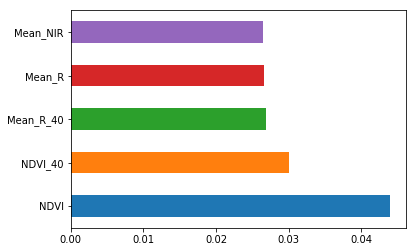

In [4]:
#create Gaussian classifier
rfbase_clf=RandomForestClassifier(random_state=42,n_estimators=1000)
#train the model using the training set
rfbase_clf.fit(x_train,y_train)
#limit to probability for class = 1 
y_test_p=rfbase_clf.predict(x_test)
base_probs=rfbase_clf.predict_proba(x_test)[:,1]
#confusion matrix
print("Confusion matrix:",'\n',confusion_matrix(y_test,y_test_p))
#classification report
print("Classification report:",'\n',classification_report(y_test,y_test_p))

%matplotlib inline

feature_importances = pd.Series(rfbase_clf.feature_importances_, index = x_test.columns)
feature_importances.nlargest(5).plot(kind='barh')

# 3. LinearSVM Classifier - Base Model:

In [5]:
from sklearn import svm

In [54]:
svm_l_clf = svm.SVC(kernel="linear")
svm_l_clf.fit(train_x_s, y_train)
y_test_p=svm_l_clf.predict(test_x_s)

print("train score:",svm_l_clf.score(train_x_s, y_train))
print("test score:",svm_l_clf.score(test_x_s, y_test))
print("Confusion matrix:",'\n',confusion_matrix(y_test, y_test_p))
print("Classification report:",'\n',classification_report(y_test, y_test_p))
print()

train score: 1.0
test score: 0.8392857142857143
Confusion matrix: 
 [[13  0  0  0  0  0  1  0  0]
 [ 0 24  1  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1  0]
 [ 0  5  0 16  0  0  0  2  0]
 [ 0  0  0  1 24  0  0  0  4]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  0  1  2  2  0  0  9  0]
 [ 0  0  0  1  4  0  0  0 12]]
Classification report: 
               precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.83      0.96      0.89        25
        car        0.88      0.93      0.90        15
   concrete        0.80      0.70      0.74        23
      grass        0.80      0.83      0.81        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.75      0.64      0.69        14
       tree        0.75      0.71      0.73        17

   micro avg       0.84      0.84      0.84       168
   macro avg       0.85      0.84      0

# 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

In [3]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'C' : np.arange(0.01, 10, 0.2)}

svm_l_obj = svm.SVC(kernel = 'linear')

svm_l_Grid = GridSearchCV(svm_l_obj, param_grid, cv = 5, refit = True, verbose = 0)

svm_l_Grid.fit(train_x_s, y_train)

/Users/zoezhou/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
svm_l_Grid_Best = svm_l_Grid.best_estimator_
svm_l_Grid_Para = svm_l_Grid.best_params_

svm_l_p = svm_l_Grid_Best.predict(test_x_s)

print("train score:",svm_l_Grid_Best.score(train_x_s, y_train))
print("test score:",svm_l_Grid_Best.score(test_x_s, y_test))
print("Confusion matrix:",'\n',confusion_matrix(y_test, svm_l_p))
print("Classification report:",'\n',classification_report(y_test, svm_l_p))

train score: 0.8875739644970414
test score: 0.8214285714285714
Confusion matrix: 
 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  3  0  5  2  0  0  4  0]
 [ 0  0  0  1  2  0  0  0 14]]
Classification report: 
               precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.93      0.97        15
   concrete        0.65      0.74      0.69        23
      grass        0.83      0.86      0.85        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.80      0.29      0.42        14
       tree        0.82      0.82      0.82        17

   micro avg       0.82      0.82      0.82       168
   macro avg       0.85  

# 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

In [43]:
param_grid = {'C' : np.arange(0.01, 10, 0.2),
              'degree': [2,4,5,6]}

svm_p_obj = svm.SVC(kernel = 'poly',gamma=10)

svm_p_Grid = GridSearchCV(svm_p_obj, param_grid, cv = 5, refit = True, verbose = 0)

svm_p_Grid.fit(train_x_s, y_train)


/Users/zoezhou/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]), 'degree': [2, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
svm_p_Grid_Best = svm_p_Grid.best_estimator_
svm_p_Grid_Para = svm_p_Grid.best_params_

svm_p_p = svm_p_Grid_Best.predict(test_x_s)

print("train score:",svm_p_Grid_Best.score(train_x_s, y_train))
print("test score:",svm_p_Grid_Best.score(test_x_s, y_test))
print("Confusion matrix:",'\n',confusion_matrix(y_test, svm_p_p))
print("Classification report:",'\n',classification_report(y_test, svm_p_p))

train score: 1.0
test score: 0.7797619047619048
Confusion matrix: 
 [[13  0  0  0  0  0  1  0  0]
 [ 0 19  1  2  2  0  0  0  1]
 [ 0  0 14  0  0  0  0  1  0]
 [ 0  4  0 17  1  0  0  1  0]
 [ 0  1  0  0 23  0  0  3  2]
 [ 0  0  0  1  0 14  0  0  0]
 [ 2  0  0  0  0  0 14  0  0]
 [ 0  2  0  4  4  0  0  4  0]
 [ 0  0  0  1  3  0  0  0 13]]
Classification report: 
               precision    recall  f1-score   support

    asphalt        0.87      0.93      0.90        14
   building        0.73      0.76      0.75        25
        car        0.93      0.93      0.93        15
   concrete        0.68      0.74      0.71        23
      grass        0.70      0.79      0.74        29
       pool        1.00      0.93      0.97        15
     shadow        0.93      0.88      0.90        16
       soil        0.44      0.29      0.35        14
       tree        0.81      0.76      0.79        17

   micro avg       0.78      0.78      0.78       168
   macro avg       0.79      0.78      0

# 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

In [59]:
param_grid = {'C' : np.arange(0.01, 10, 0.2),
              'gamma': [0.1,1,10,100]}

svm_rbf_obj = svm.SVC(kernel = 'rbf')

svm_rbf_Grid = GridSearchCV(svm_rbf_obj, param_grid, cv = 5, refit = True, verbose = 0)

svm_rbf_Grid.fit(train_x_s, y_train)

svm_rbf_Grid_Best = svm_rbf_Grid.best_estimator_
svm_rbf_Grid_Para = svm_rbf_Grid.best_params_

svm_rbf_p = svm_rbf_Grid_Best.predict(test_x_s)

print("train score:",svm_rbf_Grid_Best.score(train_x_s, y_train))
print("test score:",svm_rbf_Grid_Best.score(test_x_s, y_test))
print("Confusion matrix:",'\n',confusion_matrix(y_test, svm_rbf_p))
print("Classification report:",'\n',classification_report(y_test, svm_rbf_p))

train score: 1.0
test score: 0.36904761904761907
Confusion matrix: 
 [[ 0  0  0 14  0  0  0  0  0]
 [ 0 17  0  7  0  0  0  0  1]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  3  0 20  0  0  0  0  0]
 [ 0  0  0  9  9  0  0  0 11]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  4]
 [ 0  0  0 13  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 16]]
Classification report: 
               precision    recall  f1-score   support

    asphalt        0.00      0.00      0.00        14
   building        0.85      0.68      0.76        25
        car        0.00      0.00      0.00        15
   concrete        0.19      0.87      0.31        23
      grass        0.90      0.31      0.46        29
       pool        0.00      0.00      0.00        15
     shadow        0.00      0.00      0.00        16
       soil        0.00      0.00      0.00        14
       tree        0.50      0.94      0.65        17

   micro avg       0.37      0.37      0.37       168
   macro avg       0.27      0.31      

/Users/zoezhou/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/zoezhou/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 7. From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

Based on the classification report, I consider the weighted average, linear SVM base model performed the best because it has the highest balanced average precision, recall and f1-score. Random forest performed similarly but with slightly lower scores on recall and f1.

# 8. Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 

When using the grid search to compare different kernels to each other, the loss function per the ClassificationReport provided insight into which kernel is "appropriate" for the given dataset. In this case, it looks like the SVM Linear Kernel is the best amongst the 3 models.

If the number of features is large, one may not need to map data to a higher dimensional space because the non-linear mappingdoes not improve the performance. Using the linear kernel is good enough.

When 'gamma' is set to 0.01 (e.g. [0.01, 1, 10, 100]) for the SVM RBF, the Classification Report performedthe best with these avg / total - precision: 0.86, recall: 0.84, f1: 0.83. RBF can yield more accurate results but it also took a long time to complete. Therefore, it might cause the overfitting.

# 9. Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

C parameter used in steps 4-6 is np.arange(0.01, 10, 0.2). 

Theoretically, the higher the C, the higher the margin, the higher the Misclassification rate. However, in sklearn it’s backwards, the lower the C value we set, the higher the margin.

C controls the trade-off between achieving a low error on the training data and minimising the norm of the weights. 

# 10. It is also important to check for overfitting: For your best performing model provide metrics for the training and test sets and explain whether your model is overfitting the data. 

According to the train set scores of those 4 models, only linear kernel grid search is not overfitting(scored 0.88). All the other 3 models have a train set scores equal to 1. So this will be my best performing model.